#Assignments for Notebook 4
---

##Clasification of Wines
There are several different models to use for classification and each one has its benefits and limitations.  In the next exercise, we'll predict the type of wine (white or red) using the K-nearest neighbors model.

We'll use the **K-nearest neighbors** model to classify the type of wine. This algorithm can classify the different classes, e.g. red or white, according to how close their features are from each other. New data is classified by assigning the new object to the class most common among its k nearest neighbors. For more information, you can look in [An introduction to statistical learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf) by James, Witten, Hastie and Tibshirani.

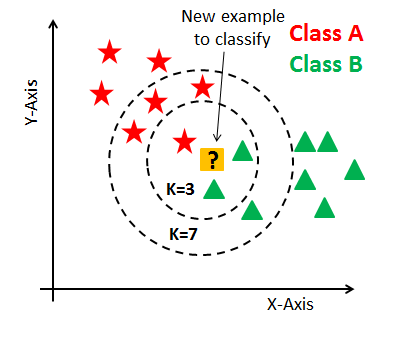

First, import the red and white wine datasets and concatenate them the same way we did in the notebooks.

```
import pandas as pd

df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_red['hue'] = '1' #Instead of "hue", you can name this column as you want, for example, it could be called "color" or "Brian"
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df_white['hue'] = '0'


df_wine = pd.concat([..., ...], ignore_index=True)
```


In [9]:
import pandas as pd

df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_red['hue'] = '1'
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df_white['hue'] = '0'


df_wine = pd.concat([df_red, df_white], ignore_index=True)

The next thing to do is to split our data into a **train set** and **test set **using the same function we used in the notebook. The training set should be 77% of the data and the test set 33%. Remember that the target ("_y_") should be a Pandas DataFrame of only one column (it is called a Pandas Series) that indicates the type of wine. The features of the model ("_X_") should be a DataFrame with all the other columns (that provide information that influences the color of the wine) except the target.

```
from sklearn.model_selection import train_test_split

X = df.drop([...], axis=1)
y = df[...]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ... , random_state=42)
```



In [10]:
from sklearn.model_selection import train_test_split

X = df_wine.drop(['hue'], axis=1)
y = df_wine['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

To make better predictions, normalize the feature data using the `StandardScaler()` function, we'll use it the same way we did on the notebook.

```
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(...)
X_train = scaler.transform(...) # Now, the X_train DataFrame is scaled
X_test = scaler.transform(...)
```



In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Then we'll have to import Scikit Learn and create the _KNeighborsClassifier_ from the _sklearn.neighbors_ library. To declare the classifier we'll have to indicate the n_neighbors parameter, this is the value k and it could be, for instance, 3. In KNN, k is the number of nearest neighbors. Choosing the “right” number is important, not only because the algorithm requires such a parameter, but also because the appropriate number of nearest neighbors determines the performance of the model.


```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = ...)
```



In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

As we did previously in the notebook, fit the model using the train data with the `knn.fit( ... , ... )`
function.


In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now we have our trained model, the next thing to do is to evaluate the predictions made by it. To do it, predict the color of the testing set of features using the 
`predict()` function, then use those predictions to calculate the accuracy score and make the confusion matrix and the classification report.

```
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = knn.predict(...)
print("Accuracy score: " + str(accuracy_score(..., ...)))
print("\nConfusion matrix: \n" + str(confusion_matrix(..., ...)))
print("\nClassification report: \n" + str(classification_report(..., ...)))

```



In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = knn.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9897435897435898

Confusion matrix: 
[[1579    9]
 [  13  544]]

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1588
           1       0.98      0.98      0.98       557

    accuracy                           0.99      2145
   macro avg       0.99      0.99      0.99      2145
weighted avg       0.99      0.99      0.99      2145



Finally, according to the evaluation, you can ask yourself how good at predicting was your model. Can it be better? There are always ways to polish or optimize it. In this case, maybe there is another value for k that will improve the score of the model. Try to find it!

There are, at first sight, two ways to find it. One would be trying manually the model for different values of k and save the results to compare them. Another way would be to make the computer do that job for you! If you are feeling bold, try to create a function (as in the first notebook) that uses the wine dataset (df_wine) and the value of k as parameters and returns the score of the model by doing all the previous steps (split the data, scale it, make the model, train it and calculate the score). Then, you can evaluate the model for a range of k values (using a _for_ loop) and print the results, or even better, plot them!

Note: _If this workshop is your first time working with a programming language, this last exercise can be tricky. Don't get frustrated if it doesn't work, but rather ask the teachers and your classmates. You can continue to the next notebook without doing it._

In [15]:
def pred(data, k ):
  df = data.copy()
  X = df.drop(['hue'], axis=1)
  y = df['hue']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
  scaler = preprocessing.StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  score = accuracy_score(y_test, y_pred)

  #print(f"Accuracy score: " + str(score) + f' for {k}')
  return score


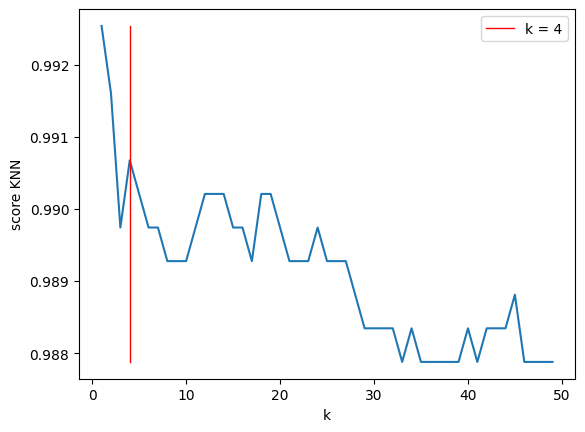

In [16]:
import matplotlib.pyplot as plt

score = []
k = [i for i in range(1,50)]
for i in k:
  score.append(pred(df_wine,i))

k0 = 4
plt.plot(k,score)
plt.xlabel('k')
plt.ylabel('score KNN')
plt.plot([k0,k0],[min(score),max(score)],'r',lw = 1,label = f'k = {k0}')
plt.legend()
plt.show()

Did you find another value of k that could improve the performance?

A model with k = 1 may have the best performance, but be aware of it, because it can very likely be that the model is _overfitting_ the data. For more information, you can look at this [article](https://medium.com/swlh/overfitting-vs-underfitting-d742b4ffac57).